In [45]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import chart_studio.plotly as py # visualization library

In [47]:
from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/MSC/FinalProject/Iowa_Liquor_Sales.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
df['year_week'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%U')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [48]:

df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year_month,year_week
0,INV-09565300016,2018-01-02,5151,IDA LIQUOR,"500, HWY 175",IDA GROVE,51445.0,NaN,47.0,IDA,...,12,750,9.64,14.46,12,173.52,9.00,2.38,2018-01,2018-00
1,INV-09565300024,2018-01-02,5151,IDA LIQUOR,"500, HWY 175",IDA GROVE,51445.0,NaN,47.0,IDA,...,24,375,3.07,4.61,24,110.64,9.00,2.38,2018-01,2018-00
2,INV-09553300008,2018-01-02,5286,SAUCE,"108, COLLEGE",IOWA CITY,52240.0,NaN,52.0,JOHNSON,...,24,375,1.86,2.79,24,66.96,9.00,2.38,2018-01,2018-00
3,INV-09571700007,2018-01-02,4777,CASEY'S GENERAL STORE #1365 / PAULLINA,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1750,7.20,10.80,12,129.60,21.00,5.55,2018-01,2018-00
4,INV-09548000006,2018-01-02,4641,KUM & GO #573 / SE 14TH DM,5830 SE 14TH ST,DES MOINES,50315.0,NaN,77.0,POLK,...,6,1750,7.17,10.76,3,32.28,5.25,1.39,2018-01,2018-00


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815511 entries, 0 to 1815510
Data columns (total 26 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Invoice/Item Number    object        
 1   Date                   datetime64[ns]
 2   Store Number           int64         
 3   Store Name             object        
 4   Address                object        
 5   City                   object        
 6   Zip Code               float64       
 7   Store Location         object        
 8   County Number          float64       
 9   County                 object        
 10  Category               int64         
 11  Category Name          object        
 12  Vendor Number          int64         
 13  Vendor Name            object        
 14  Item Number            int64         
 15  Item Description       object        
 16  Pack                   int64         
 17  Bottle Volume (ml)     int64         
 18  State Bottle Cost     

## data quality looks good, no missing data 


In [50]:
df.describe()

,Store Number,Zip Code,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,1.815511e+06,1.814485e+06,1.556830e+06,1.815511e+06,1.815511e+06,1.815511e+06,1.815511e+06,1.815511e+06,1.815511e+06,1.815511e+06,1.815511e+06,1.815511e+06,1.815511e+06,1.815511e+06
mean,4.397712e+03,5.122057e+04,5.667519e+01,1.041439e+06,3.289297e+02,3.890781e+04,1.328411e+01,9.130763e+02,9.019833e+00,1.353209e+01,1.918623e+01,1.893418e+02,1.444759e+01,3.811891e+00
std,1.170583e+03,9.838756e+02,2.749024e+01,4.141688e+04,9.809799e+01,2.230523e+04,1.115316e+01,6.746729e+02,7.936721e+00,1.190455e+01,5.259100e+01,8.368438e+02,5.871975e+01,1.551229e+01
min,2.106000e+03,5.000200e+04,1.000000e+00,1.012100e+06,1.150000e+02,1.054800e+04,1.000000e+00,5.000000e+01,9.000000e-01,1.350000e+00,-2.400000e+02,-1.080000e+03,-5.400000e+01,-1.426000e+01
25%,3.676000e+03,5.031400e+04,3.100000e+01,1.012100e+06,2.590000e+02,1.178800e+04,6.000000e+00,3.750000e+02,4.130000e+00,6.200000e+00,6.000000e+00,6.072000e+01,3.600000e+00,9.500000e-01
50%,4.557000e+03,5.101200e+04,5.900000e+01,1.031100e+06,3.010000e+02,3.630800e+04,1.200000e+01,7.500000e+02,7.170000e+00,1.076000e+01,1.200000e+01,9.420000e+01,9.000000e+00,2.370000e+00
75%,5.319000e+03,5.230100e+04,7.700000e+01,1.081600e+06,4.210000e+02,6.485800e+04,1.200000e+01,1.750000e+03,1.045000e+01,1.568000e+01,1.200000e+01,1.710000e+02,1.050000e+01,2.770000e+00
max,1.015700e+04,5.722200e+04,9.900000e+01,1.701100e+06,4.340000e+02,9.381800e+05,4.800000e+01,5.250000e+03,9.200000e+01,1.380000e+02,1.320000e+04,2.509320e+05,1.320000e+04,3.487070e+03


Category Name
AMERICAN CORDIALS & LIQUEUR              11.05
AMERICAN VODKAS                    12412307.67
CANADIAN WHISKIES                   8540064.98
SPICED RUM                           998133.19
TEMPORARY &  SPECIALTY PACKAGES          67.60
TEMPORARY & SPECIALTY PACKAGES         1807.10
WHISKEY LIQUEUR                     4277364.13
Name: Volume Sold (Liters), dtype: float64


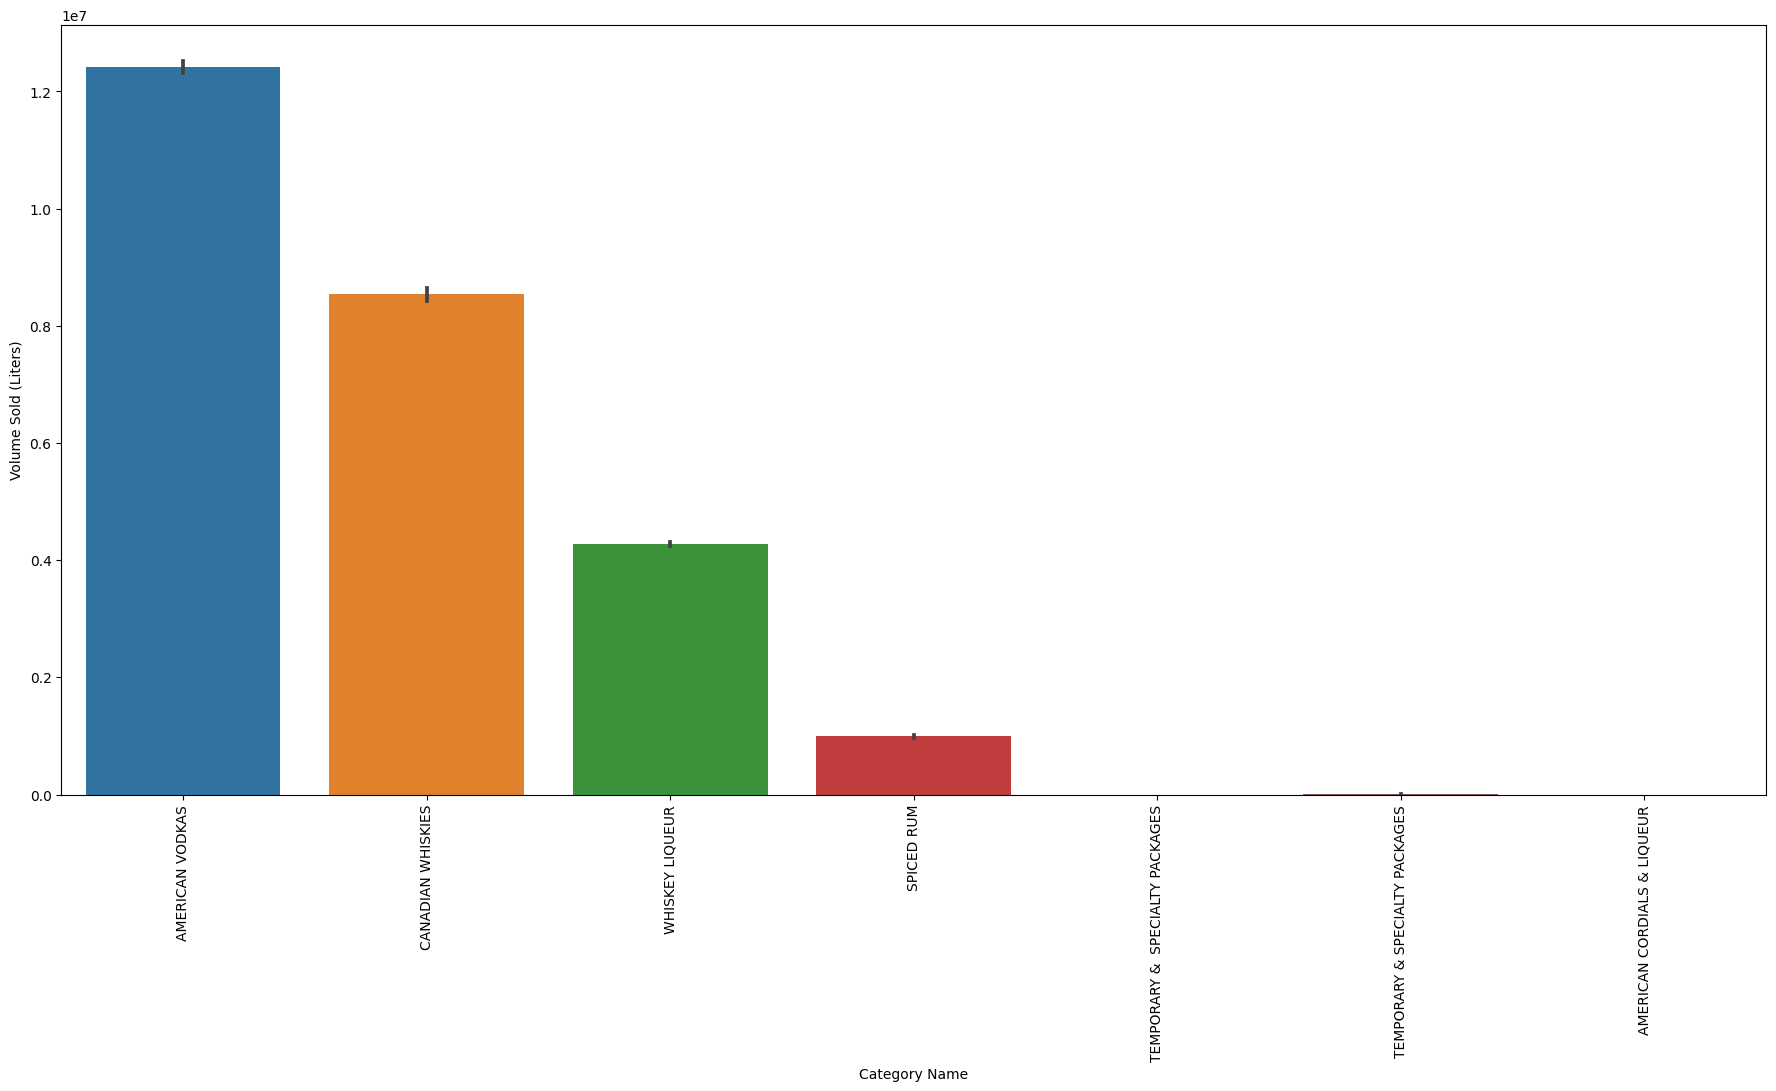

In [51]:
# Top Items
print(df.groupby('Category Name')['Volume Sold (Liters)'].sum())
plt.figure(figsize=(22,10))
sns.barplot(data=df, x='Category Name', y='Volume Sold (Liters)',estimator="sum")
plt.xticks(rotation=90)
plt.show()

In [52]:
df_vodka=df[(df['Category Name']=='AMERICAN VODKAS')]
df_CandaWhiskies=df[(df['Category Name']=='CANADIAN WHISKIES')]
df_Whiskies=df[(df['Category Name']=='WHISKEY LIQUEUR')]
df_Rum=df[(df['Category Name']=='SPICED RUM')]

In [53]:
df_vodka.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year_month,year_week
0,INV-09565300016,2018-01-02,5151,IDA LIQUOR,"500, HWY 175",IDA GROVE,51445.0,NaN,47.0,IDA,...,12,750,9.64,14.46,12,173.52,9.00,2.38,2018-01,2018-00
2,INV-09553300008,2018-01-02,5286,SAUCE,"108, COLLEGE",IOWA CITY,52240.0,NaN,52.0,JOHNSON,...,24,375,1.86,2.79,24,66.96,9.00,2.38,2018-01,2018-00
3,INV-09571700007,2018-01-02,4777,CASEY'S GENERAL STORE #1365 / PAULLINA,NaN,NaN,NaN,NaN,NaN,NaN,...,6,1750,7.20,10.80,12,129.60,21.00,5.55,2018-01,2018-00
4,INV-09548000006,2018-01-02,4641,KUM & GO #573 / SE 14TH DM,5830 SE 14TH ST,DES MOINES,50315.0,NaN,77.0,POLK,...,6,1750,7.17,10.76,3,32.28,5.25,1.39,2018-01,2018-00
5,INV-09550300004,2018-01-02,2448,BOTTLE BOUTIQUE,705 E. SECOND,INDIANOLA,50125.0,POINT (-93.55261600000001 41.358176),91.0,WARREN,...,12,1000,4.05,6.08,12,72.96,12.00,3.17,2018-01,2018-00


Item Description
FIVE O'CLOCK VODKA           1773381.13
FIVE O'CLOCK VODKA PET        206457.00
HAWKEYE VODKA                3856451.67
HAWKEYE VODKA 80 PRF MINI      16108.00
HAWKEYE VODKA MINI             19979.45
HAWKEYE VODKA PET             328370.25
TITOS HANDMADE VODKA         6207516.82
TITOS HANDMADE VODKA MINI       4043.35
Name: Volume Sold (Liters), dtype: float64


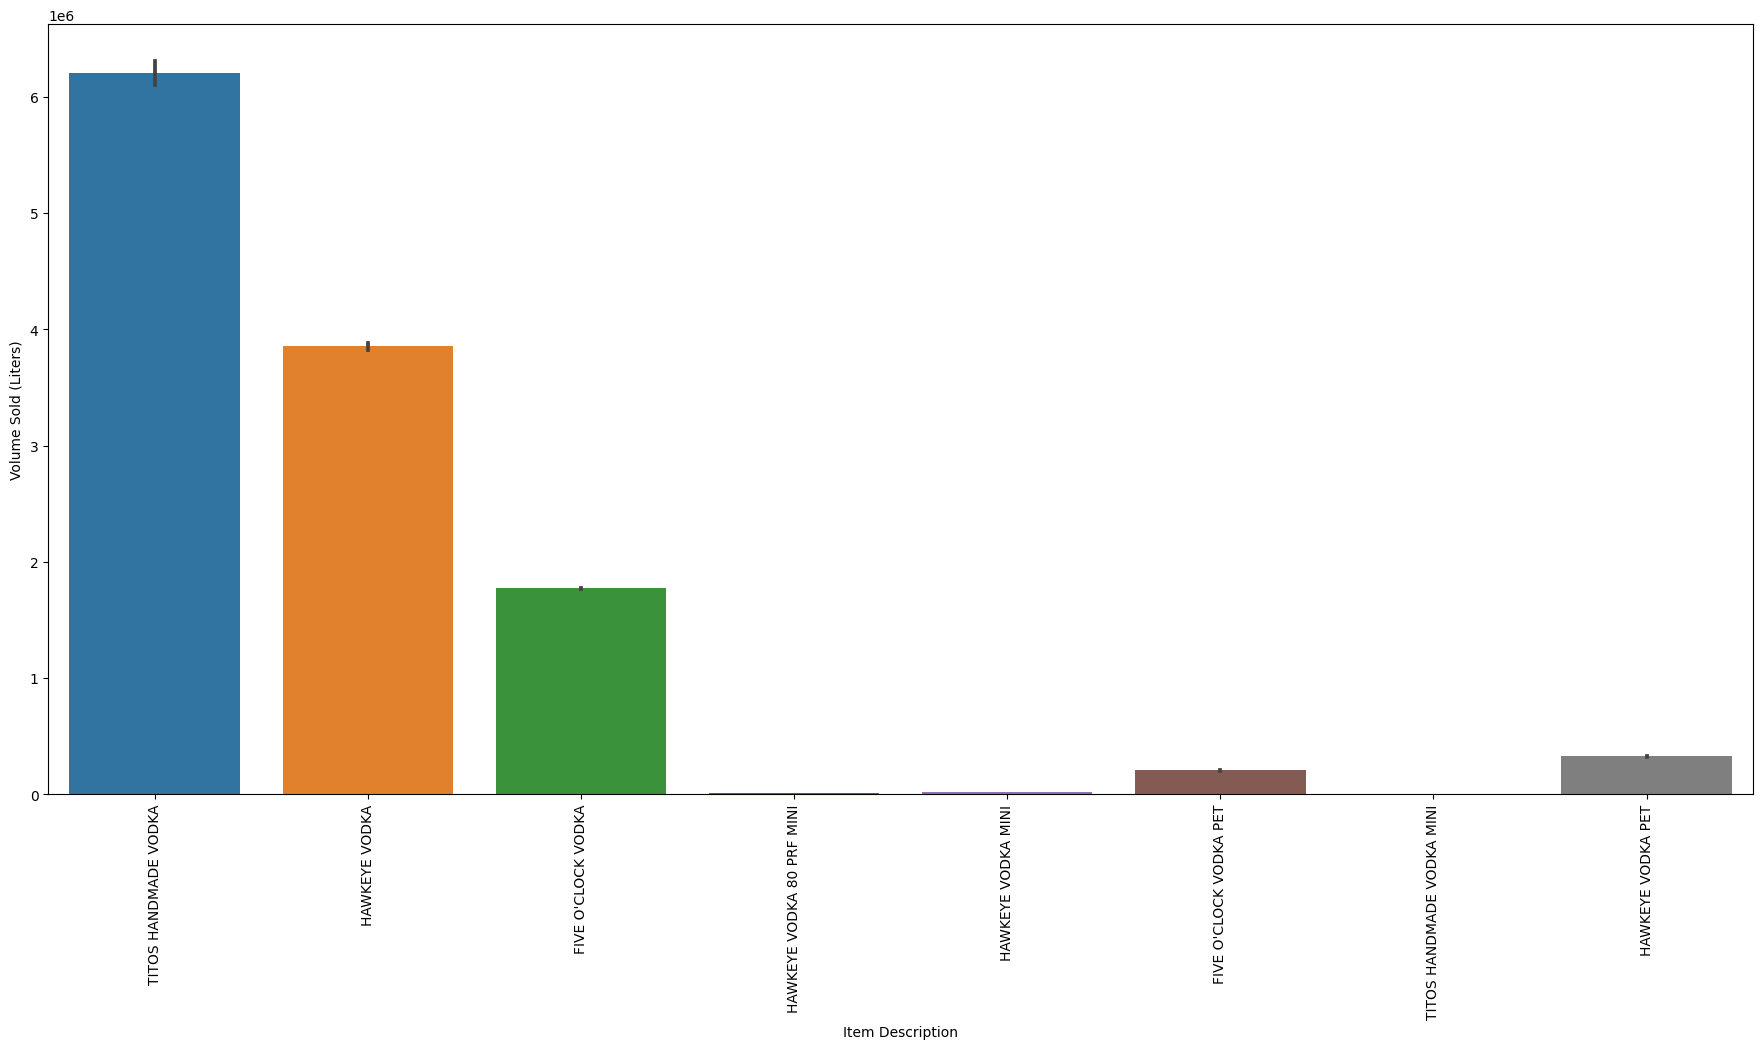

In [54]:
#df_vodka.plot.bar(x=np.arange(len(df_vodka['Item Description'])),y=df_vodka['Volume Sold (Liters)'])
print(df_vodka.groupby('Item Description')['Volume Sold (Liters)'].sum())
plt.figure(figsize=(22,10))
sns.barplot(data=df_vodka, x='Item Description', y='Volume Sold (Liters)',estimator="sum")
plt.xticks(rotation=90)
plt.show()


In [55]:
#df_vodka['Week_Number'] = df_vodka['Date'].dt.isocalendar().week
#df_vodka['Date'] = pd.to_datetime(df_vodka['Date'], errors='coerce')
#df_vodka['Year-Week'] = df_vodka['Date'].dt.strftime('%Y-%U')
#df_vodka['month_year'] = df_vodka['Date'].dt.strftime('%Y-%m')
df_vodka_titos=df_vodka[(df_vodka['Item Description']=='TITOS HANDMADE VODKA')]
df_vodka_titos

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year_month,year_week
0,INV-09565300016,2018-01-02,5151,IDA LIQUOR,"500, HWY 175",IDA GROVE,51445.0,NaN,47.0,IDA,...,12,750,9.64,14.46,12,173.52,9.0,2.38,2018-01,2018-00
30,INV-09548700052,2018-01-02,3644,WAL-MART 2764 / ALTOONA,3501 8TH ST SW,ALTOONA,50009.0,POINT (-93.505276 41.644195),77.0,POLK,...,6,1750,19.00,28.50,6,166.62,10.5,2.77,2018-01,2018-00
35,INV-09570000007,2018-01-02,3763,MAIN STREET LIQUORS / HAWARDEN,911 CENTRAL AVE,HAWARDEN,51023.0,POINT (-96.48518900000002 42.996100000000006),84.0,SIOUX,...,12,1000,12.67,19.01,12,219.12,12.0,3.17,2018-01,2018-00
38,INV-09556300011,2018-01-02,5427,BEECHER LIQUOR,1691 ASBURY RD,DUBUQUE,52001.0,POINT (-90.696886 42.500775000000004),31.0,DUBUQUE,...,6,1750,19.00,28.50,6,166.62,10.5,2.77,2018-01,2018-00
41,INV-09569700002,2018-01-02,4904,LARCHWOOD QUICK STOP,832 BROADWAY ST,LARCHWOOD,51241.0,POINT (-96.43415 43.45255),60.0,LYON,...,12,750,9.64,14.46,12,173.52,9.0,2.38,2018-01,2018-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815495,INV-56243800012,2023-02-28,5710,CASEY'S #3763 -WAVERLY,1032 4TH STREET SW,WAVERLY,50677.0,POINT (-92.47551 42.71557),NaN,BREMER,...,6,1750,19.00,28.50,2,57.00,3.5,0.92,2023-02,2023-09
1815497,INV-56246100009,2023-02-28,4565,KUM & GO #228 / SIOUX CITY,1925 S LAKEPORT ST,SIOUX CITY,51106.0,POINT (-96.34664 42.47085),NaN,WOODBURY,...,12,375,5.42,8.13,8,65.04,3.0,0.79,2023-02,2023-09
1815501,INV-56245000032,2023-02-28,3820,"CHARLIE'S WINE AND SPIRITS,",507 W 19TH ST,SIOUX CITY,51103.0,POINT (-96.42021 42.51054),NaN,WOODBURY,...,12,1000,13.17,19.76,120,2371.20,120.0,31.70,2023-02,2023-09
1815502,INV-56240900006,2023-02-28,4651,CASEY'S GENERAL STORE #2300 / JEWELL,301 MAIN ST,JEWELL,50130.0,POINT (-93.64 42.30264),NaN,HAMILTON,...,12,375,5.42,8.13,12,97.56,4.5,1.18,2023-02,2023-09


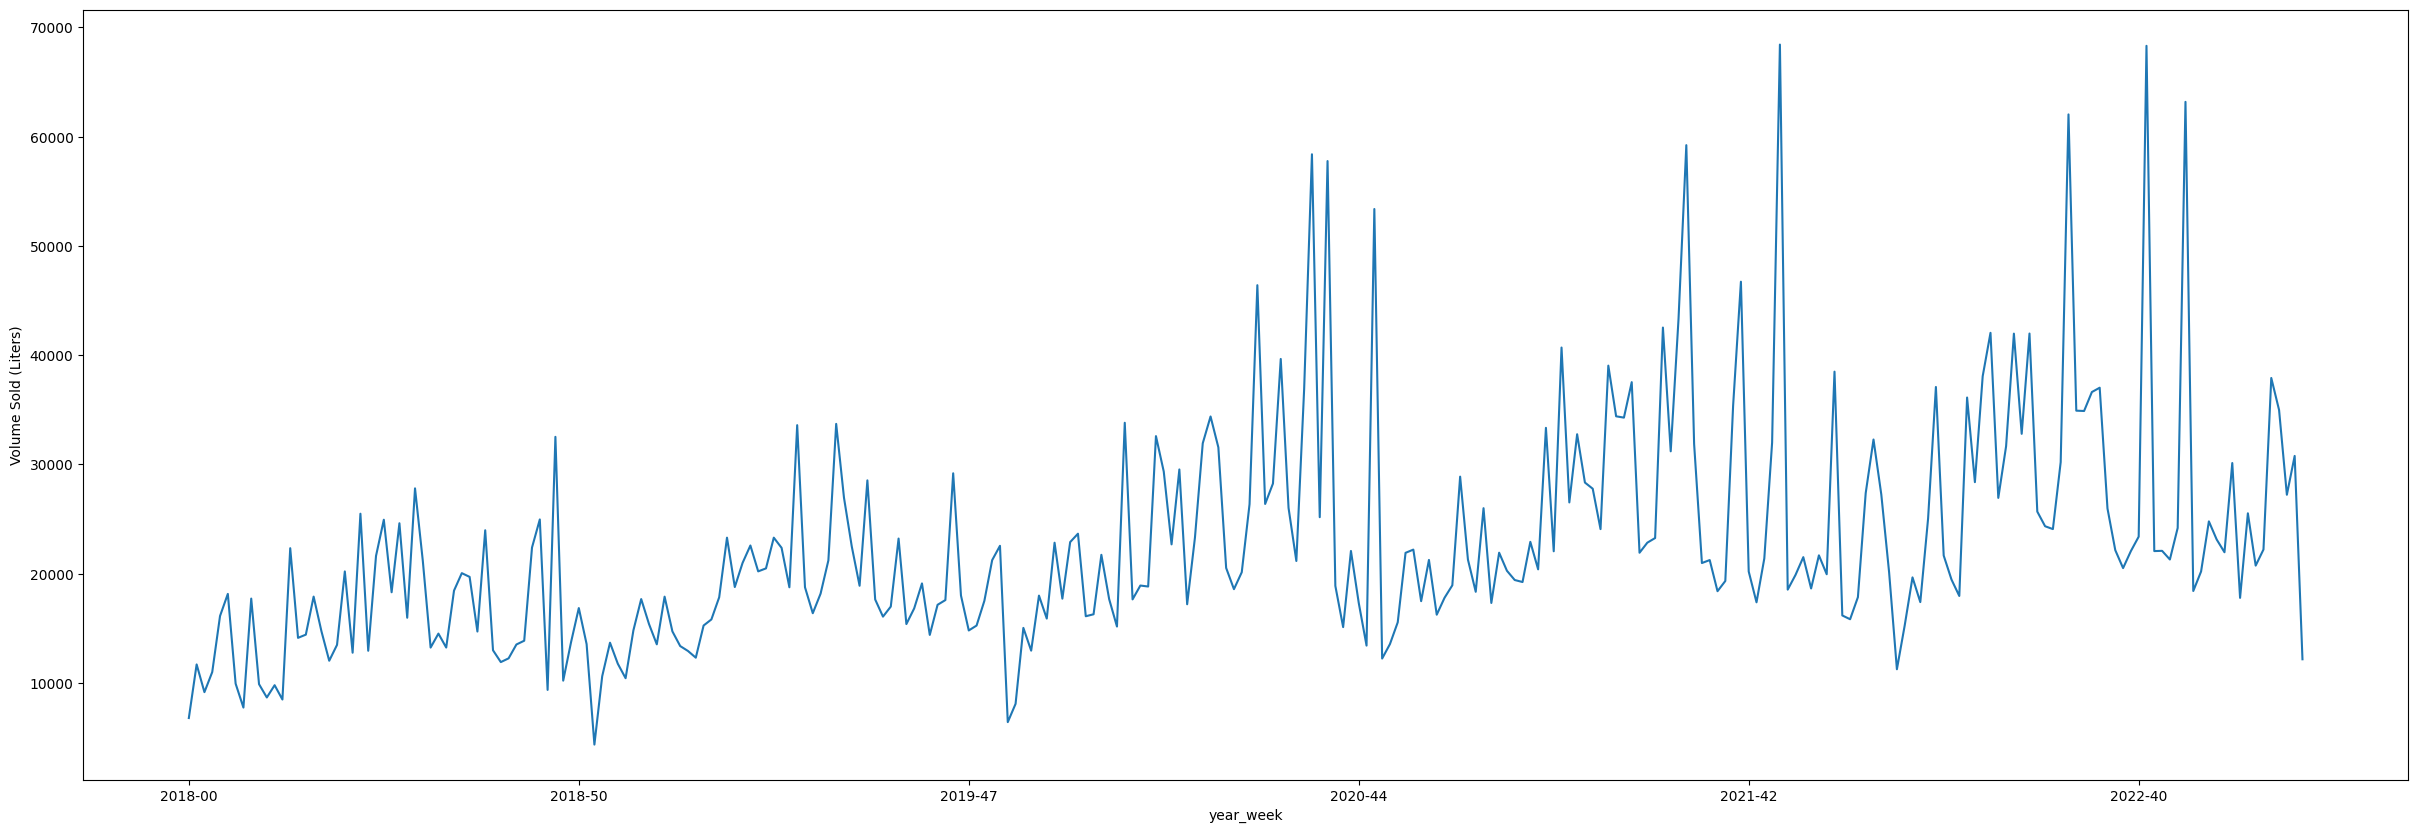

In [56]:
fig, axs = plt.subplots(figsize=(30, 10))
df_vodka_titos.groupby("year_week")["Volume Sold (Liters)"].sum().plot(
    kind='line', rot=0, ax=axs
)

plt.xlabel("year_week");  # custom x label using Matplotlib
plt.ylabel("Volume Sold (Liters)");

Item Description
BLACK VELVET                                7011837.78
BLACK VELVET  APPLE                            4438.50
BLACK VELVET APPLE                           138953.00
BLACK VELVET APPLE MINI                         230.55
BLACK VELVET MINI                             30616.40
BLACK VELVET PEACH CANADIAN WHISKEY           38858.00
BLACK VELVET PEACH CANADIAN WHISKEY MINI        101.50
BLACK VELVET PET                             215471.25
BLACK VELVET RESERVE                         262716.50
BLACK VELVET TOASTED CARAMEL                 722149.25
BLACK VELVET TRAVELER                        114692.25
Name: Volume Sold (Liters), dtype: float64


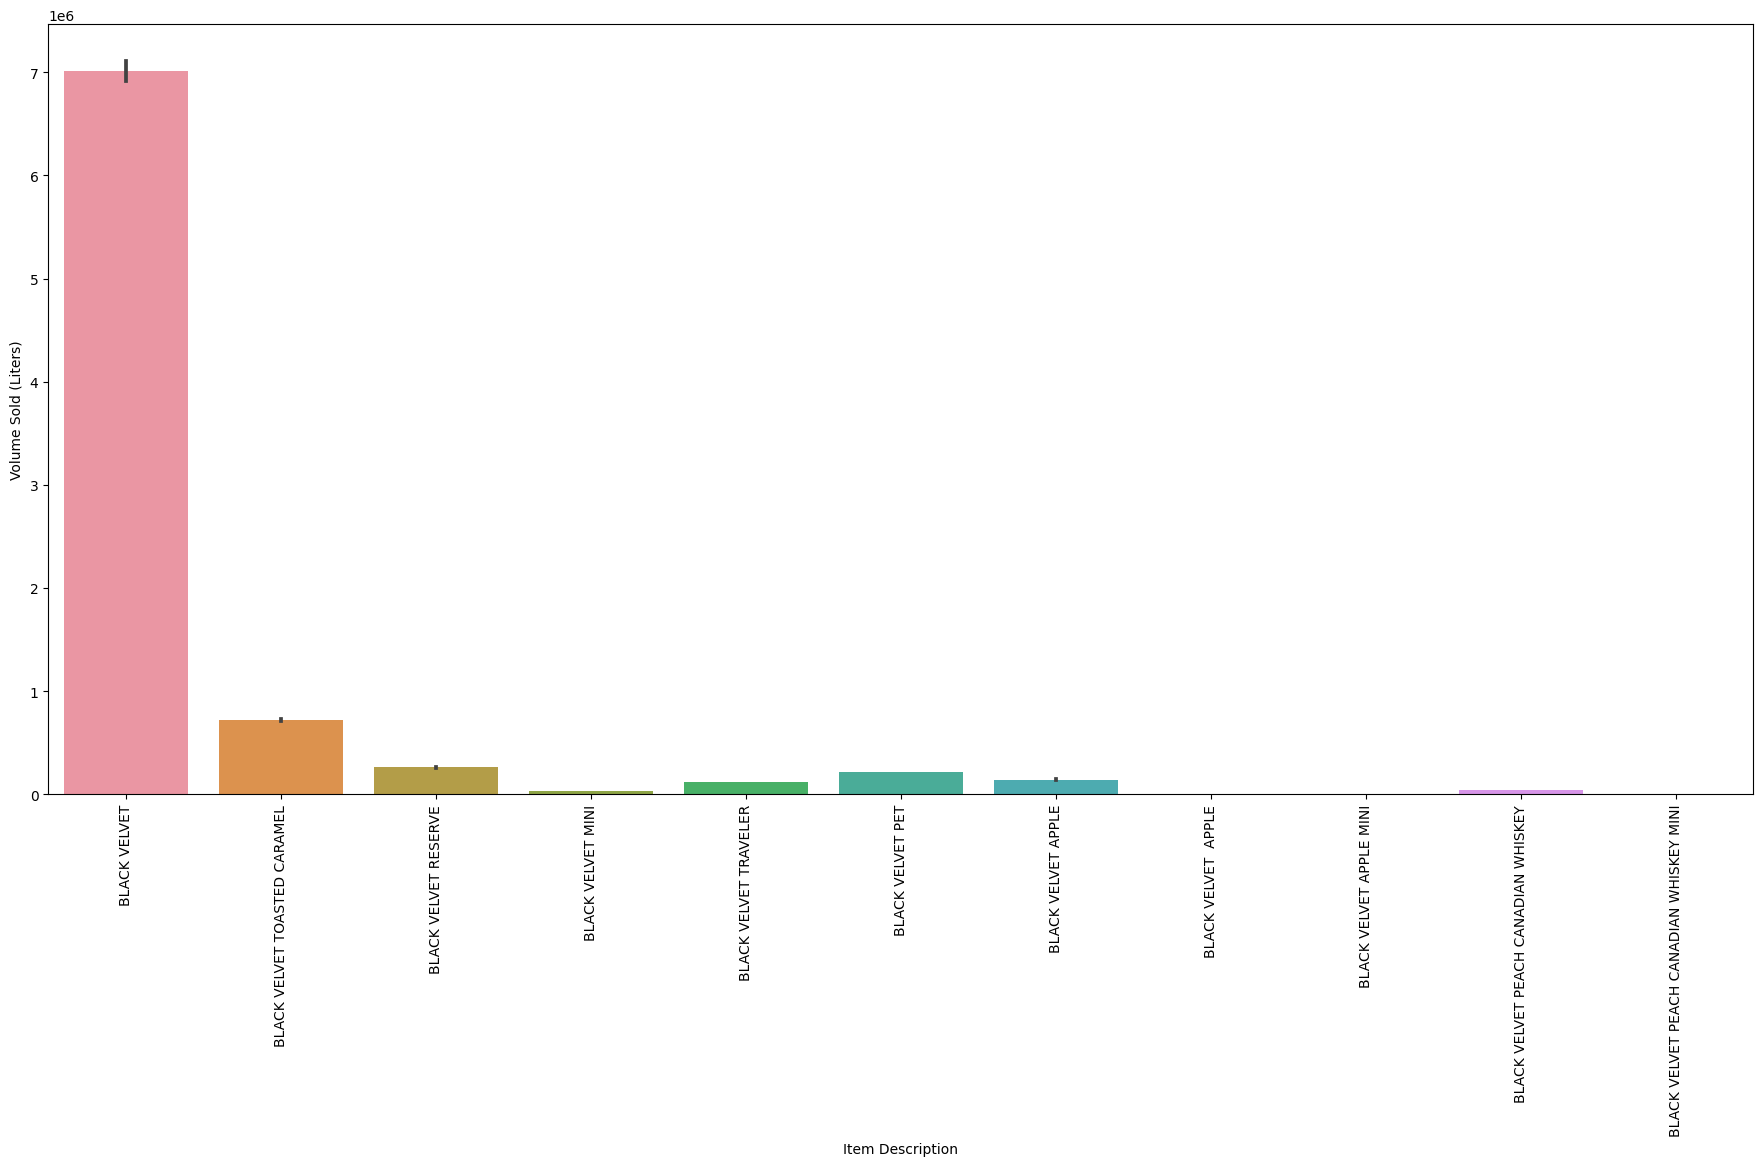

In [57]:
print(df_CandaWhiskies.groupby('Item Description')['Volume Sold (Liters)'].sum())
plt.figure(figsize=(22,10))
sns.barplot(data=df_CandaWhiskies, x='Item Description', y='Volume Sold (Liters)',estimator="sum")
plt.xticks(rotation=90)
plt.show()

In [58]:
df_CandaWhiskies_BlackVelvet=df_CandaWhiskies[(df_CandaWhiskies['Item Description']=='BLACK VELVET')]
df_CandaWhiskies_BlackVelvet

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year_month,year_week
1,INV-09565300024,2018-01-02,5151,IDA LIQUOR,"500, HWY 175",IDA GROVE,51445.0,NaN,47.0,IDA,...,24,375,3.07,4.61,24,110.64,9.00,2.38,2018-01,2018-00
22,INV-09563700012,2018-01-02,5474,WEST SIDE LIQUOR,919 W 5TH ST,WATERLOO,50702.0,POINT (-92.346356 42.488567),7.0,BLACK HAWK,...,12,1000,6.63,9.95,12,119.40,12.00,3.17,2018-01,2018-00
28,INV-09563500034,2018-01-02,4265,KWIK STOP 3 / WATERLOO,1104 WASHINGTON ST,WATERLOO,50702.0,POINT (-92.336965 42.489106),7.0,BLACK HAWK,...,12,1000,6.63,9.95,5,49.75,5.00,1.32,2018-01,2018-00
31,INV-09563900015,2018-01-02,5174,JIM'S FOOD / SULLIVAN AVE,"437, SULLIVAN AVE",WATERLOO,50701.0,POINT (-92.355915 42.487326),7.0,BLACK HAWK,...,24,375,3.07,4.61,6,27.66,2.25,0.59,2018-01,2018-00
36,INV-09558400016,2018-01-02,5124,PRICE CHOPPER / JOHNSTON,5440 NW 86TH ST,JOHNSTON,50131.0,POINT (-93.738772 41.65919800000001),77.0,POLK,...,6,1750,10.45,15.68,6,94.08,10.50,2.77,2018-01,2018-00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815498,INV-56243600014,2023-02-28,4203,LIQUOR AND TOBACCO OUTLET /,620 W BREMER AVE,WAVERLY,50677.0,POINT (-92.47887 42.72571),NaN,BREMER,...,12,1000,7.00,10.50,12,119.40,12.00,3.17,2023-02,2023-09
1815505,INV-56237800015,2023-02-28,4131,FAREWAY STORES #933 / URBANDALE,8450 MEREDITH DR,URBANDALE,50322.0,POINT (-93.73435 41.64385),NaN,POLK,...,12,750,5.50,8.25,12,94.20,9.00,2.37,2023-02,2023-09
1815506,INV-56254000014,2023-02-28,4910,PRIME MART #3 / WATERLOO,1008 LAPORTE RD,WATERLOO,50702.0,POINT (-92.32301 42.47635),NaN,BLACK HAWK,...,48,200,1.75,2.63,48,112.32,9.60,2.53,2023-02,2023-09
1815507,INV-56246300009,2023-02-28,6344,HELLO MART LLC / SIOUX CITY,4218 MORNINGSIDE AVENUE,SIOUX CITY,51106.0,POINT (-96.35286 42.47065),NaN,WOODBURY,...,24,375,3.25,4.88,24,110.64,9.00,2.37,2023-02,2023-09


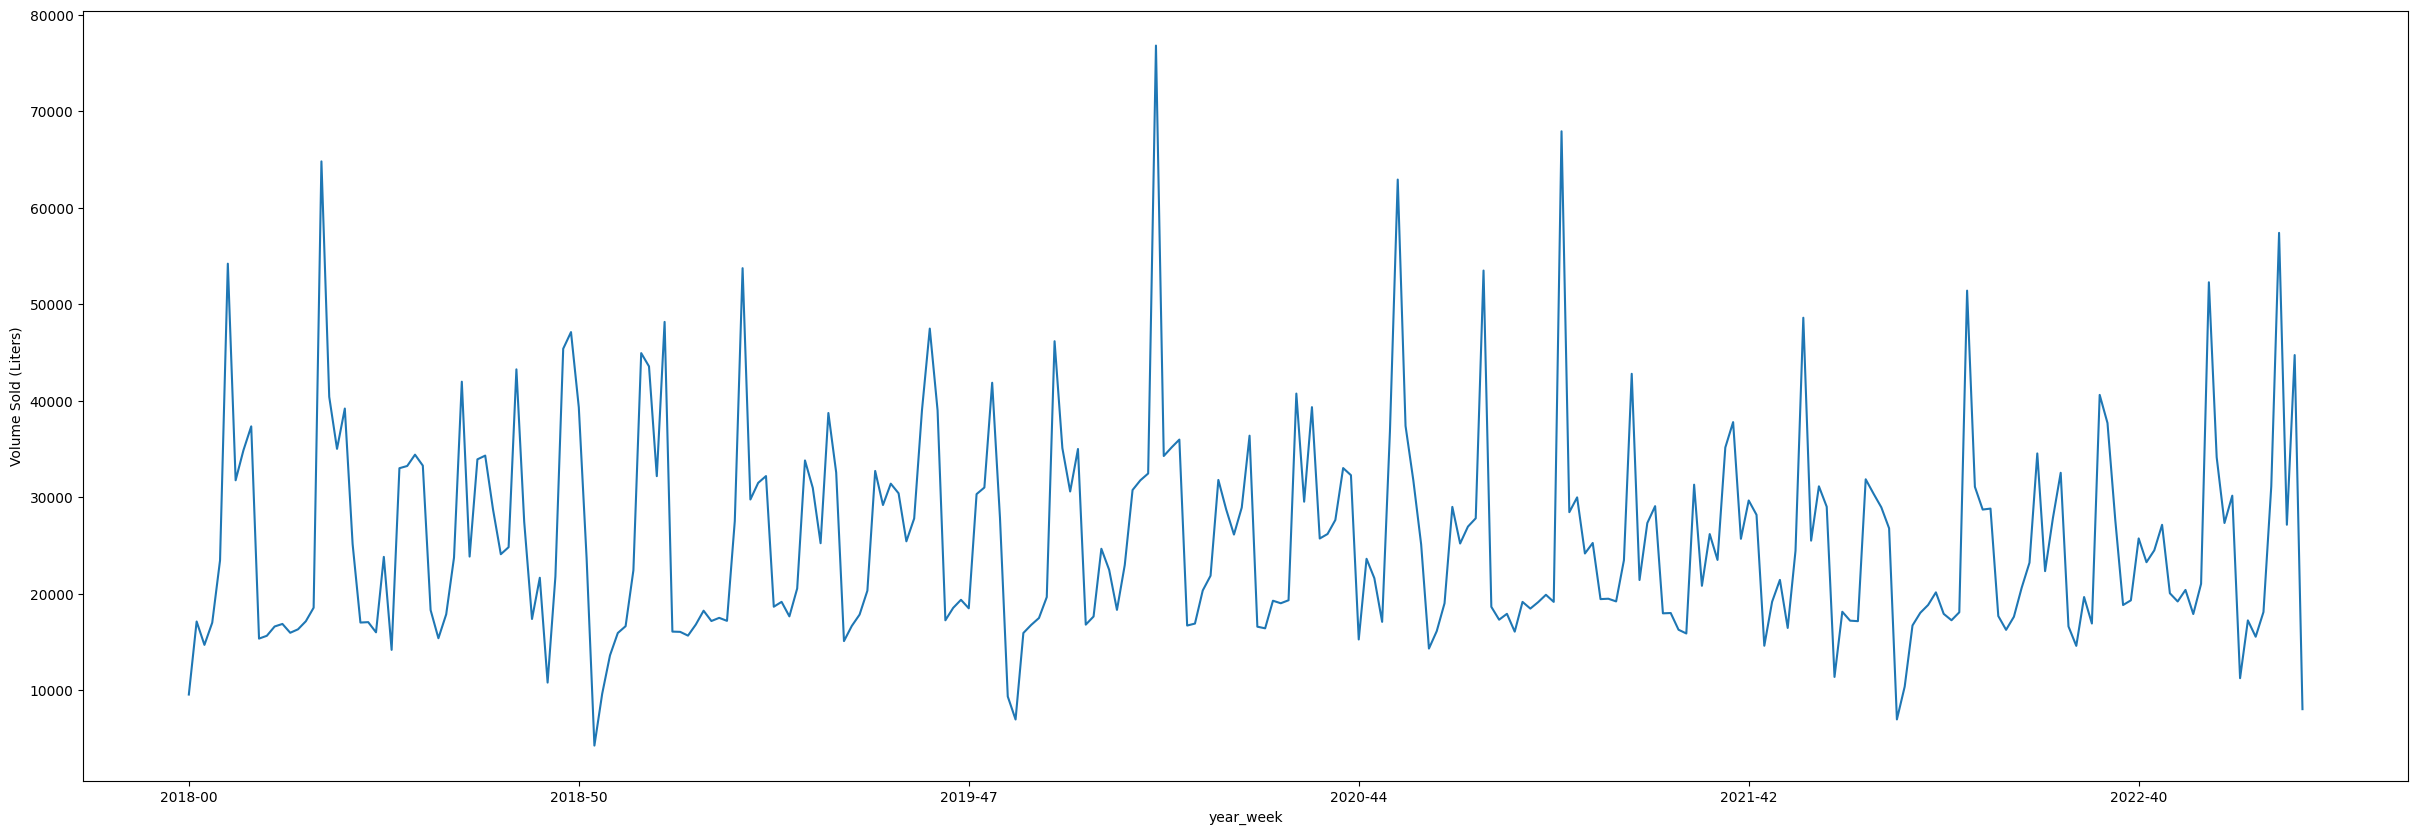

In [59]:
fig, axs = plt.subplots(figsize=(30, 10))

df_CandaWhiskies_BlackVelvet.groupby("year_week")["Volume Sold (Liters)"].sum().plot(
    kind='line', rot=0, ax=axs
)

plt.xlabel("year_week");  # custom x label using Matplotlib
plt.ylabel("Volume Sold (Liters)");

### **Apply Naive Method**

In [60]:
from sklearn.metrics import mean_absolute_percentage_error, \
  mean_absolute_error, r2_score, mean_squared_error
#df_CandaWhiskies_BlackVelvet.set_index('Date', inplace=True)
#df_CandaWhiskies_BlackVelvet['Volume Sold (Liters)_pred'] = df_CandaWhiskies_BlackVelvet['Volume Sold (Liters)'].shift(1)
df1=df_CandaWhiskies_BlackVelvet[['Volume Sold (Liters)','year_week']].groupby('year_week').sum('Volume Sold (Liters)')
#df1.set_index('year_week', inplace=True)
df1['Volume Sold (Liters)_pred'] = df1['Volume Sold (Liters)'].shift(1)
df1

,Volume Sold (Liters),Volume Sold (Liters)_pred
year_week,,
2018-00,9545.32,NaN
2018-01,17117.13,9545.32
2018-02,14693.80,17117.13
2018-03,16995.20,14693.80
2018-04,23449.55,16995.20
...,...,...
2023-05,31126.35,18100.28
2023-06,57392.95,31126.35
2023-07,27145.12,57392.95


In [61]:
y_true = df1.iloc[1:]['Volume Sold (Liters)']
y_pred = df1.iloc[1:]['Volume Sold (Liters)_pred']
mean_absolute_percentage_error(y_true, y_pred)

0.3480814783248901

In [62]:
# MSE
mean_squared_error(y_true, y_pred)
r2_score(y_true, y_pred)

-0.3171213221291569

#### **Apply Simple moving average**

In [63]:
df1['SMA-20'] = df1['Volume Sold (Liters)'].rolling(20).mean()
y_true = df1.iloc[19:]['Volume Sold (Liters)']
y_pred = df1.iloc[19:]['SMA-20']
mean_absolute_percentage_error(y_true, y_pred)

0.3813226537842575

In [64]:
df1['SMA-10'] = df1['Volume Sold (Liters)'].rolling(10).mean()
y_true = df1.iloc[9:]['Volume Sold (Liters)']
y_pred = df1.iloc[9:]['SMA-10']
mean_absolute_percentage_error(y_true, y_pred)

0.3679378477050075

In [65]:
df1['SMA-4'] = df1['Volume Sold (Liters)'].rolling(4).mean()
y_true = df1.iloc[3:]['Volume Sold (Liters)']
y_pred = df1.iloc[3:]['SMA-4']
mean_absolute_percentage_error(y_true, y_pred)

0.3013871787456827

In [66]:
df1['SMA-2'] = df1['Volume Sold (Liters)'].rolling(2).mean()
y_true = df1.iloc[1:]['Volume Sold (Liters)']
y_pred = df1.iloc[1:]['SMA-2']
mean_absolute_percentage_error(y_true, y_pred)

0.17404073916244509

#### **Apply Simple Exp Smoothing**

In [67]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses = SimpleExpSmoothing(
    df1['Volume Sold (Liters)'],
    initialization_method='legacy-heuristic')
#ses = SimpleExpSmoothing()


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [68]:
alpha=0.2
df1.index.freq = 'w'
res = ses.fit(smoothing_level=alpha, optimized=False)

In [69]:
df1['SES'] = res.predict(start=df1.index[0], end=df1.index[-1])

In [70]:
df1['SES-1'] = df1['SES'].shift(-1)


In [71]:
df1
y_true = df1.iloc[1:-1]['Volume Sold (Liters)']
y_pred = df1.iloc[1:-1]['SES-1']
#y_pred.tail(5)
mean_absolute_percentage_error(y_true, y_pred)

0.29819378115500295

#### **Apply Haltwinter Exponential Smoothing**

In [72]:
N_test = 52
train = df1.iloc[:-N_test]
test = df1.iloc[-N_test:]
# boolean series to index df rows
train_idx = df1.index <= train.index[-1]
test_idx = df1.index > train.index[-1]

In [73]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hw = ExponentialSmoothing(
    train['Volume Sold (Liters)'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='mul', seasonal_periods=52)
res_hw = hw.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


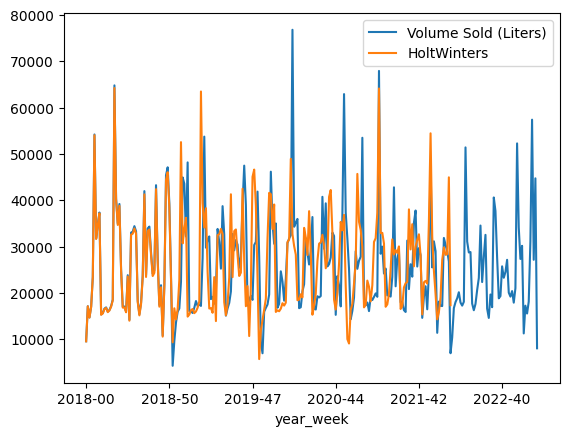

In [74]:
df1.loc[train_idx, 'HoltWinters'] = res_hw.fittedvalues
df1.loc[test_idx, 'HoltWinters'] = res_hw.forecast(N_test)
df1[['Volume Sold (Liters)', 'HoltWinters']].plot();

In [75]:
print("Train RMSE:", mean_absolute_percentage_error(train['Volume Sold (Liters)'], res_hw.fittedvalues))
print("Test RMSE:", mean_absolute_percentage_error(test['Volume Sold (Liters)'], res_hw.forecast(N_test)))

Train RMSE: 0.24291192635809222
Test RMSE: 0.1727773082702044


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


#### **Analysis for Covid Period**

In [76]:
df_CW_Black_Covid=df_CandaWhiskies_BlackVelvet[(df_CandaWhiskies_BlackVelvet['Date']>='2020-02-15')]
df_CW_Black_Covid_New=df_CW_Black_Covid[['Volume Sold (Liters)','year_week']].groupby('year_week').sum('Volume Sold (Liters)')
#df1.set_index('year_week', inplace=True)


In [90]:
df_CW_Black_Covid['Date'].min()
df_CW_Black_Covid_New

,Volume Sold (Liters),Volume Sold (Liters)_pred,SMA-20,SMA-4,SMA-2,SES,SES-1,HoltWinters
year_week,,,,,,,,
2020-07,30588.03,NaN,NaN,NaN,NaN,30588.030000,30588.030000,30531.186572
2020-08,34993.76,30588.03,NaN,NaN,32790.895,30588.030000,31469.176000,34864.143752
2020-09,16790.79,34993.76,NaN,NaN,25892.275,31469.176000,28533.498800,16697.819975
2020-10,17632.38,16790.79,NaN,25001.2400,17211.585,28533.498800,26353.275040,17502.651664
2020-11,24653.71,17632.38,NaN,23517.6600,21143.045,26353.275040,26013.362032,24427.750190
...,...,...,...,...,...,...,...,...
2023-05,31126.35,18100.28,23720.6790,20498.8275,24613.315,21307.718795,23271.445036,NaN
2023-06,57392.95,31126.35,25649.1335,30539.1825,44259.650,23271.445036,30095.746029,NaN
2023-07,27145.12,57392.95,26040.8950,33441.1750,42269.035,30095.746029,29505.620823,NaN


#### **Nive Base**

In [77]:
df_CW_Black_Covid_New['Volume Sold (Liters)_pred'] = df_CW_Black_Covid_New['Volume Sold (Liters)'].shift(1)
#df_CW_Black_Covid_New
y_true = df_CW_Black_Covid_New.iloc[1:]['Volume Sold (Liters)']
y_pred = df_CW_Black_Covid_New.iloc[1:]['Volume Sold (Liters)_pred']
mean_absolute_percentage_error(y_true, y_pred)

0.3464751301864673

SMA

In [78]:
df_CW_Black_Covid_New['SMA-20'] = df_CW_Black_Covid_New['Volume Sold (Liters)'].rolling(20).mean()
y_true = df_CW_Black_Covid_New.iloc[19:]['Volume Sold (Liters)']
y_pred = df_CW_Black_Covid_New.iloc[19:]['SMA-20']
mean_absolute_percentage_error(y_true, y_pred)

0.330481448676617

In [79]:
df_CW_Black_Covid_New['SMA-4'] = df_CW_Black_Covid_New['Volume Sold (Liters)'].rolling(4).mean()
y_true = df_CW_Black_Covid_New.iloc[3:]['Volume Sold (Liters)']
y_pred = df_CW_Black_Covid_New.iloc[3:]['SMA-4']
mean_absolute_percentage_error(y_true, y_pred)

0.2671223788504061

In [80]:
df_CW_Black_Covid_New['SMA-2'] = df_CW_Black_Covid_New['Volume Sold (Liters)'].rolling(2).mean()
y_true = df_CW_Black_Covid_New.iloc[3:]['Volume Sold (Liters)']
y_pred = df_CW_Black_Covid_New.iloc[3:]['SMA-2']
mean_absolute_percentage_error(y_true, y_pred)

0.1715803387263516

SES

In [81]:
ses = SimpleExpSmoothing(
    df_CW_Black_Covid_New['Volume Sold (Liters)'],
    initialization_method='legacy-heuristic')
alpha=0.2
df_CW_Black_Covid_New.index.freq = 'w'
res = ses.fit(smoothing_level=alpha, optimized=False)
df_CW_Black_Covid_New['SES'] = res.predict(start=df_CW_Black_Covid_New.index[0], end=df_CW_Black_Covid_New.index[-1])
df_CW_Black_Covid_New['SES-1'] = df_CW_Black_Covid_New['SES'].shift(-1)
y_true = df_CW_Black_Covid_New.iloc[1:-1]['Volume Sold (Liters)']
y_pred = df_CW_Black_Covid_New.iloc[1:-1]['SES-1']
#y_pred.tail(5)
mean_absolute_percentage_error(y_true, y_pred)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.25237911812812897

HSE

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


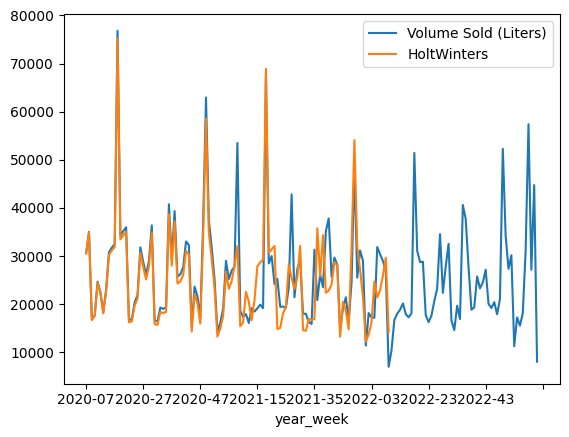

In [82]:
N_test = 52
train1 = df_CW_Black_Covid_New.iloc[:-N_test]
test1 = df_CW_Black_Covid_New.iloc[-N_test:]
# boolean series to index df rows
train_idx1 = df_CW_Black_Covid_New.index <= train1.index[-1]
test_idx1 = df_CW_Black_Covid_New.index > train1.index[-1]
hw1 = ExponentialSmoothing(
    train1['Volume Sold (Liters)'],
    initialization_method='legacy-heuristic',
    trend='mul', seasonal='mul', seasonal_periods=52)
res_hw1 = hw1.fit()
df_CW_Black_Covid_New.loc[train_idx1, 'HoltWinters'] = res_hw1.fittedvalues
df_CW_Black_Covid_New.loc[test_idx1, 'HoltWinters'] = res_hw1.forecast(N_test)
df_CW_Black_Covid_New[['Volume Sold (Liters)', 'HoltWinters']].plot();


In [83]:
print("Train RMSE:", mean_absolute_percentage_error(train1['Volume Sold (Liters)'], res_hw1.fittedvalues))
print("Test RMSE:", mean_absolute_percentage_error(test1['Volume Sold (Liters)'], res_hw1.forecast(N_test)))

Train RMSE: 0.13341459221273738
Test RMSE: 0.21622209632273678


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
